## gradient descent on quadratic functions


In [1]:
import numpy as np
from scipy import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### function designed for gd on quadratic functions 0.5xQx - bx
## Q: positive definite matrix, n by n
## b: vector 1 by n
## x0: initial value
## T: stopping tolerance
## stepsize: stepsize for gd
## eps: converge tolerance
## trace: whether recording each updating
def gdQ(Q,b,x0 = None,T = 100,stepsize = 0.05,eps = 0.00001,trace = True):
    n = len(b)
    ## initialize
    if x0 is None:
        x0 = np.ones(n)
    ## recording iteration time
    start = 0
    x1 = x0 - stepsize*(np.dot(Q,x0)-b )
    ## recording each iteration
    if trace:
        x_trace = [x0,x1]
        eps_trace = [np.linalg.norm(x0-x1)]
    ## two stopping condition
    while( np.linalg.norm(x0-x1)>eps and start < T ):
        tmp = x1
        x1 = x1 - stepsize*(np.dot(Q,x1)-b )
        x0 = tmp
        if trace:
            x_trace.append(x1)
            eps_trace.append(np.linalg.norm(x0-x1))
        start += 1
    if trace:
        return x_trace,eps_trace
    else:
        return x1

In [6]:
n = 5
A = random.rand(n,n)
Q = np.dot(A,A.transpose())
b = 0.5*np.ones(n)
x_star,e = gdQ(Q,b)


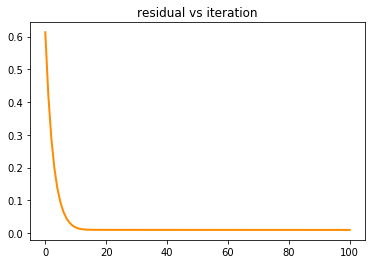

In [7]:
plt.figure()
lw = 2
x = np.arange(0,len(e),1)
plt.plot( x,e , color='darkorange',
         lw=lw)
plt.title('residual vs iteration')
plt.show()

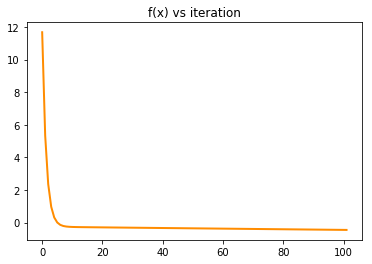

In [9]:
y_trace = [ 0.5*np.dot(np.dot(x.transpose(),Q),x)-np.dot(b,x)  for x in x_star]
plt.figure()
lw = 2
x = np.arange(0,len(y_trace),1)
plt.plot( x,y_trace , color='darkorange',
         lw=lw)
plt.title('f(x) vs iteration')
plt.show()

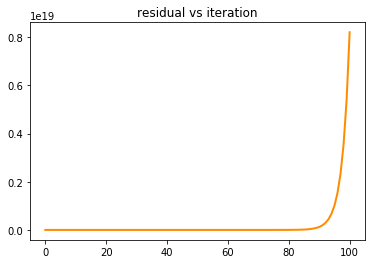

In [12]:
## a larger stepsize will not guarantee the converge
x_star,e = gdQ(Q,b,stepsize= 0.4)
plt.figure()
lw = 2
x = np.arange(0,len(e),1)
plt.plot( x,e , color='darkorange',
         lw=lw)
plt.title('residual vs iteration')
plt.show()

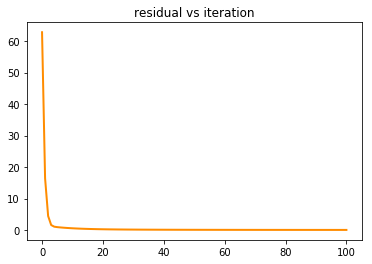

In [22]:
x_star,e = gdQ(Q,b,stepsize= 0.2,x0 = 50*np.random.random(5))
plt.figure()
lw = 2
x = np.arange(0,len(e),1)
plt.plot( x,e , color='darkorange',
         lw=lw)
plt.title('residual vs iteration')
plt.show()

## gd,sgd in logistic regression

In [71]:
### import data
data_dir = "."
X = pd.read_csv(data_dir+"/X_cancer",sep = " ")
y = pd.read_csv(data_dir+"/y_cancer")
X = np.float64(X.as_matrix())
y = np.float64(y.as_matrix())


/Users/sitenghao/python/anaconda/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/sitenghao/python/anaconda/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [150]:
len(X[1:])

42

The logistic loss function for a single y_{i} is:
$$f(\hat{y}_{i},y_{i}) = log(1+exp(-\hat{y}_{i}y_{i})) $$
Overall, the loss function is:
$$f(w) = \sum_{i = 1}^{n}log(1+exp(-y_{i}w^{T}x_{i})) $$
and the gradient is:
$$ \nabla f(w) = \sum_{i = 1}^{n}\frac{-exp(-y_{i}w^{T}x_{i})y_{i}x_{i}}{1+exp(-y_{i}w^{T}x_{i})}$$

In [117]:
## GF: the derivative function
def GF(X,y,w):
    n = np.size(y)
    F_value = 0
    for i in range(n):
        tmp = np.exp(-y[i]* np.dot(w,X[i]))
        F_value = F_value -y[i]*X[i]*tmp/(1+tmp)
    return F_value
## gradient descent for above loss function
## mainly change the derivative function
def gd_logistic(X,y,x0 = None,T = 100,stepsize = 0.005,eps = 0.00001,trace = True):
    n = len(X[0])
    if x0 is None:
        x0 = 0.05*np.ones(n)
    start = 0
    x1 = x0 - stepsize*GF(X,y,x0)
    if trace:
        x_trace = [x0,x1]
        eps_trace = [np.linalg.norm(x0-x1)]
    while( np.linalg.norm(x0-x1)>eps and start < T ):
        tmp = x1
        x1 = x1 - stepsize*GF(X,y,x1)
        x0 = tmp
        if trace:
            x_trace.append(x1)
            eps_trace.append(np.linalg.norm(x0-x1))
        start += 1
    if trace:
        return x_trace,eps_trace
    else:
        return x1


In [118]:
w_star,e_star = gd_logistic(X,y)


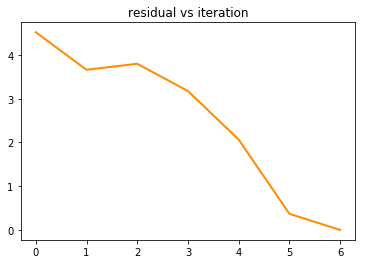

In [119]:
plt.figure()
lw = 2
x = np.arange(0,len(e_star),1)
plt.plot( x,e_star , color='darkorange',
         lw=lw)
plt.title('residual vs iteration')
plt.show()

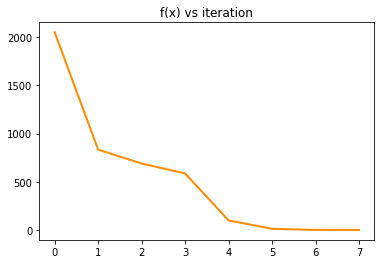

In [120]:
def F(X,y,w):
    n = np.size(y)
    F_value = 0
    for i in range(n):
        tmp = np.exp(-y[i]* np.dot(w,X[i]))
        F_value = F_value + np.log(1+tmp)
    return F_value
y_trace = [ F(X,y,w)  for w in w_star]
plt.figure()
lw = 2
x = np.arange(0,len(y_trace),1)
plt.plot( x,y_trace , color='darkorange',
         lw=lw)
plt.title('f(x) vs iteration')
plt.show()

In [151]:
import random
def GF_S(X,y,w,I):
    n = np.size(y)
    F_value = 0
    for i in I:
        tmp = np.exp(-y[i]* np.dot(w,X[i]))
        F_value = F_value -y[i]*X[i]*tmp/(1+tmp)
    return F_value
## sgd for above loss function
## mainly change the derivative function
def sgd_logistic(X,y,B = 10,x0 = None,T = 300,stepsize = 0.005,eps = 0.00001,trace = True):
    n = len(X[0])
    if x0 is None:
        x0 = 0.05*np.ones(n)
    start = 0
    I = random.sample(range(len(y)),B)
    x1 = x0 - stepsize*GF_S(X,y,x0,I)
    if trace:
        x_trace = [x0,x1]
        eps_trace = [np.linalg.norm(x0-x1)]
    while( np.linalg.norm(x0-x1)>eps and start < T ):
        I = random.sample(range(len(y)),B)
        tmp = x1
        x1 = x1 - stepsize*GF_S(X,y,x1,I)
        x0 = tmp
        if trace:
            x_trace.append(x1)
            eps_trace.append(np.linalg.norm(x0-x1))
        start += 1
    if trace:
        return x_trace,eps_trace
    else:
        return x1

In [152]:
w_star1,e_star1 = sgd_logistic(X,y)


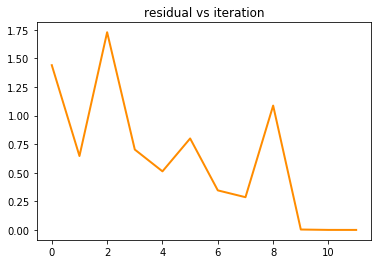

In [153]:
plt.figure()
lw = 2
x = np.arange(0,len(e_star1),1)
plt.plot( x,e_star1 , color='darkorange',
         lw=lw)
plt.title('residual vs iteration')
plt.show()

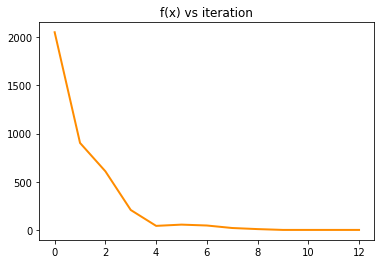

In [154]:
y_trace = [ F(X,y,w)  for w in w_star1]
plt.figure()
lw = 2
x = np.arange(0,len(y_trace),1)
plt.plot( x,y_trace , color='darkorange',
         lw=lw)
plt.title('f(x) vs iteration')
plt.show()